In [21]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd

def line(x, a, b):
    '''
    y = ax + b
    '''
    return a * x + b

def line_1(y, a, b):
    '''
    as y = ax + b
    x = ( y - b ) / a
    '''
    return ( y - b ) / a

## Расчёт давления изопропанола при 298K

$$\ln\left(\frac{p}{p_0}\right)=-\frac{\Delta_{vap}H}{R}\left(\frac{1}{T}-\frac{1}{T_0}\right)$$

In [2]:
p = np.array([ 1, 10, 40, 100, 760 ]) #mmHg
T = np.array([ -26.1, 2.4, 23.8, 39.5, 82.5 ]) #Celsius
#Convert units of p and T
T = T + 273.15 #K
p = p * 133.322 #pascal

Теперь надо выбрать величину относительно которой обезразмерить давление. Возьмём для этого $p_0$

In [3]:
p_0 = p[0]
p = p / p_0
# соответственно
T_0 = T[0]
T__1 = 1 / T - 1 / T_0

### Кастомный рисунок

In [4]:
def plot_lin_fit(x, y):
    '''
    Plots linear
    '''
    params = linregress(x, y)
    x_min = np.min(x)
    x_max = np.max(x)
    delt = x_max - x_min
    y_max = np.max(y)
    y_min = np.min(y)
    delty = y_max - y_min
    x_fine = np.linspace(x_min - delt*0.02, x_max + delt*0.02, 100)
    plt.plot(x_fine, line(x_fine, params[0], params[1]))
    move = 0.25
    plt.annotate(f'Slope: {params[0]:.3f} \nIntercept: {params[1]:.3f}', xy=(x_max - delt*move, y_max - delty* move))

### Иллюстрация

Text(0, 0.5, 'ln(p/p_0)')

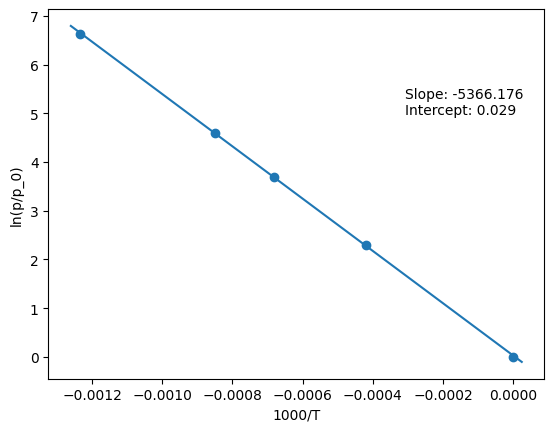

In [5]:
fig, ax= plt.subplots()
ax.scatter(T__1, np.log(p))
plot_lin_fit(T__1, np.log(p))
plt.xlabel('1000/T')
plt.ylabel('ln(p/p_0)')

In [6]:
params = linregress(T__1, np.log(p))
d_vap_H = -params[0]*8.314
d_vap_H

44614.38747813447

In [7]:
p_iso = np.exp(- d_vap_H / 8.314*(1 / 273 - 1 / T_0)) * p_0 # Pa
p_iso

1050.957425315167

## Расчёт ТД величин по получившейся константе (промежуточные резы в табличке)

In [13]:
K_p_emp = np.array([ 0.0860, 0.1131, 0.1368])
T = np.array([140, 150, 160])
T = T + 273.15
T_0 = T[0] #Возьмём за стандарт T = 140
K_p_0 = K_p_emp[0]

K_p_emp_norm = K_p_emp / K_p_0
T_1000 = 1 / T - 1 / T_0

$$\Delta_rG=-RT\ln(K_p)$$
$$\frac{-\Delta_rG}{R}\cdot\frac{1}{T} = \ln(K_p)$$

Text(0, 0.5, 'ln(Kp)')

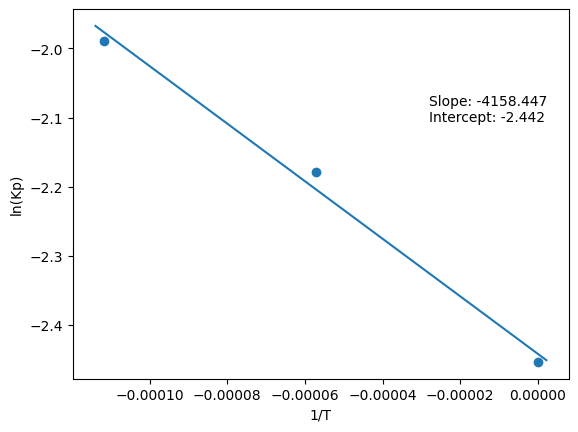

In [16]:
plot_lin_fit(T_1000, np.log(K_p_emp))
plt.scatter(T_1000, np.log(K_p_emp))
plt.xlabel('1/T')
plt.ylabel('ln(Kp)')

In [19]:
d_r_G = linregress(T_1000, np.log(K_p_emp))[0]*(-8.314)
d_r_G

34573.32570355903

## Проверка на вшивость на основании Равделя

In [31]:
df = pd.DataFrame([
    [ -217.57, -272.59 ], # d_f_H_298
    [  294.93,  309.91 ], # S
    [ -153.05, -173.63 ], # d_f_G_298
    [   74.90,   88.74], # c_p_298
    [   22.47,    8.67], #a for c_p(T)
    [  201.80*10**(-3), 303.10*10**(-3)], #b
    [ -63.50*10**(-6), -115.80*10**(-6)]  #c
], columns=['Acetone', 'Propan-2-ol'])

In [37]:
-173.63 + 153.05

-20.579999999999984

Получается довольно вшиво ...